Questions: 
1. Which age group use the most drugs of any group? 

In [102]:
from IPython.core.debugger import Tracer; 
import pandas as pd
import numpy as np
import math
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats

#https://github.com/fivethirtyeight/data/blob/master/drug-use-by-age/drug-use-by-age.csv
#key structure: [drug]-[x] where x is in {use, frequency}
#use=past 12 months 
#frequency = number of times in the past 12 months
FILEPATH = 'data/drug-use-by-age.csv'
drug_use_by_age_df = pd.read_csv(FILEPATH).replace('-', 0)

In [103]:
# USE
'''Goal here is to have a bar chart whose x axis is age group, y-axis is percentage, and compares different drugs'''


0        0
1      3.0
2        0
3      9.5
4      1.0
5     21.0
6     10.0
7      2.0
8      5.0
9     17.0
10     5.0
11     6.0
12     6.0
13    15.0
14    48.0
15    62.0
16       0
Name: crack-frequency, dtype: object

In [6]:
# FREQUENCY

In [97]:
nan_val = drug_use_by_age_df['meth-frequency'].iloc[0]

In [3]:
sns.set_style('whitegrid')

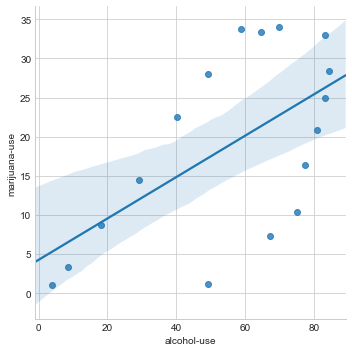

In [9]:
sns.lmplot('alcohol-use', 'marijuana-use', drug_use_by_age_df)

In [40]:
drug_use_by_age_df.columns.values[2:]

array(['alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency',
       'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency',
       'hallucinogen-use', 'hallucinogen-frequency', 'inhalant-use',
       'inhalant-frequency', 'pain-releiver-use',
       'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency',
       'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use',
       'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use',
       'sedative-frequency'], dtype=object)

Exception reporting mode: Verbose


/Users/akhiljalan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

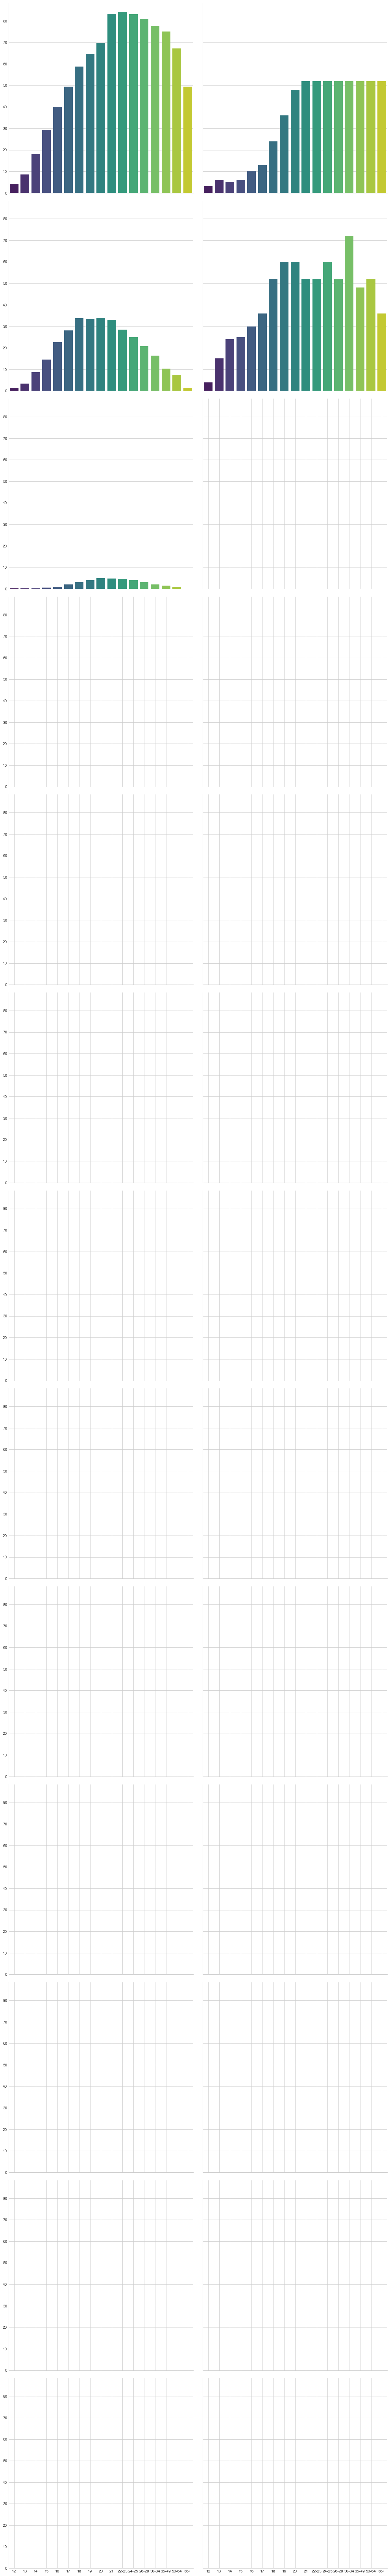

In [105]:
%xmode verbose

fig=plt.figure()

plotting_features = ['alcohol-use', 'alcohol-frequency', 'marijuana-use', 'marijuana-frequency', 'cocaine-use']
big_melt_df = drug_use_by_age_df.melt(id_vars=['age'], value_vars=drug_use_by_age_df.columns.values[2:])
graph=sns.factorplot(x='age', y='value', col='variable', 
                     col_wrap=2, data=big_melt_df, kind='bar', sharey=True, palette='viridis', size=7)

# #adjust axis titles and rotate x ticks
for ax in graph.axes.flat:
    variable = ax.get_title().split('=')[1]
    drug_name, var_type = variable.split('-')
    if var_type == 'use': 
        title = 'Percentage of{} Users'.format(drug_name.title())
    else: 
        title = 'Number of Times{} Used in Past Year'.format(drug_name.title())
    ax.set_title(title, fontsize=16)

plt.suptitle('Use and Frequency of Drugs Across Age Groups', fontsize=24)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [76]:
drug_use_by_age_df['alcohol-frequency']

0      3.0
1      6.0
2      5.0
3      6.0
4     10.0
5     13.0
6     24.0
7     36.0
8     48.0
9     52.0
10    52.0
11    52.0
12    52.0
13    52.0
14    52.0
15    52.0
16    52.0
Name: alcohol-frequency, dtype: float64

In [67]:
drug_use_by_age_df['crack-frequency'].iloc[0] != pd.notna

True

In [70]:
drug_use_by_age_df['crack-frequency'].iloc[0]

nan

ZeroDivisionError: division by zero

In [82]:
drug_name, var_type = 'alcohol-use'.split('-')
if var_type == 'use': 
    title = 'Percentage of {} Users'.format(drug_name.title())
else: 
    title = 'Frequency of {} Use'.format(drug_name.title())
    

'use'

'Alcohol'